In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import csv
import json
import pandas as pd
import math
import statistics

In [4]:
stats = {}

## Measured job load

In [5]:
csvfile = open('../cirrus-cpu-simple-rigid/data/raw-job-data/raw_job_statistics.csv', 'r')

csvreader = csv.DictReader(csvfile)
measured_job_l = []
maxtime = 0
for row in csvreader:
    if int(row['End Time']) > maxtime:
        maxtime = int(row['End Time'])
    if row['Nodes'] is None:
        print(row)
    measured_job_l.append(row)

measured_job_df = pd.DataFrame(measured_job_l)

print(measured_job_df)

measured_job_df['Start Time'] = measured_job_df['Start Time'].astype(int)
measured_job_df['Wait Time'] = measured_job_df['Wait Time'].astype(int)
measured_job_df['End Time'] = measured_job_df['End Time'].astype(int)
measured_job_df['Nodes'] = measured_job_df['Nodes'].astype(int)
measured_job_df['Makespan'] = measured_job_df['Makespan'].astype(int)
measured_job_df['Turnaround Time'] = measured_job_df['Turnaround Time'].astype(int)
measured_job_df['Coreh'] = measured_job_df['Makespan'] * measured_job_df['Nodes'] / 3600.0
measured_job_df['Efficiency'] = measured_job_df['Makespan'] / measured_job_df['Turnaround Time']

print(measured_job_df)

print(measured_job_df['Coreh'].sum())

print(maxtime)

          ID   Type Submit Time Start Time End Time Wait Time Makespan  \
0          0  Rigid           0       2984     4407      2984     1423   
1          1  Rigid         715       3839     4287      3124      448   
2          2  Rigid         715       3839     4311      3124      472   
3          3  Rigid         715       4288     4708      3573      420   
4          4  Rigid        1698       4408     5886      2710     1478   
...      ...    ...         ...        ...      ...       ...      ...   
11630  11630  Rigid       23977      24094    24923       117      829   
11631  11631  Rigid       23980      23982    24011         2       29   
11632  11632  Rigid       23983      24792    25818       809     1026   
11633  11633  Rigid       23983      24804    25757       821      953   
11634  11634  Rigid       23983      24804    24894       821       90   

      Turnaround Time     Status Nodes  
0                4407  completed   756  
1                3572  comple

In [6]:
measured_load_a = np.zeros(maxtime+1, dtype=int)
totuse = 0
for job in measured_job_l:
    temp_a = np.zeros(maxtime+1, dtype=int)
    istart = int(job['Start Time'])
    iend = int(job['End Time'])
    nodes = int(job['Nodes'])
    totuse = totuse + int(job['Makespan'])
    temp_a[istart:iend] = nodes
    measured_load_a = measured_load_a + temp_a

print(totuse)

4075948


<Figure size 640x480 with 0 Axes>

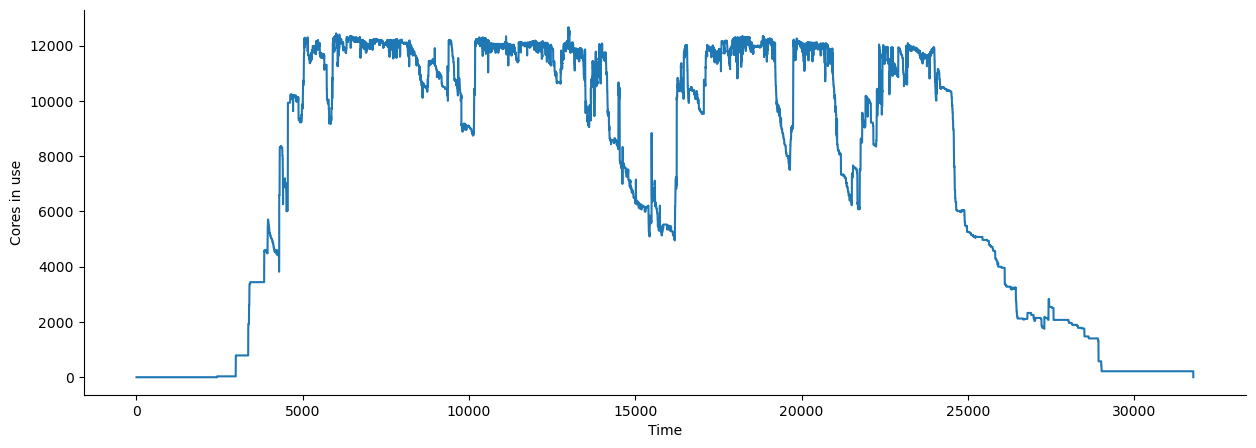

In [7]:
plt.clf()
plt.figure(figsize=(15, 5))
plt.plot(measured_load_a)
plt.xlabel("Time")
plt.ylabel("Cores in use")
sns.despine()
# plt.savefig("measured_load.png")

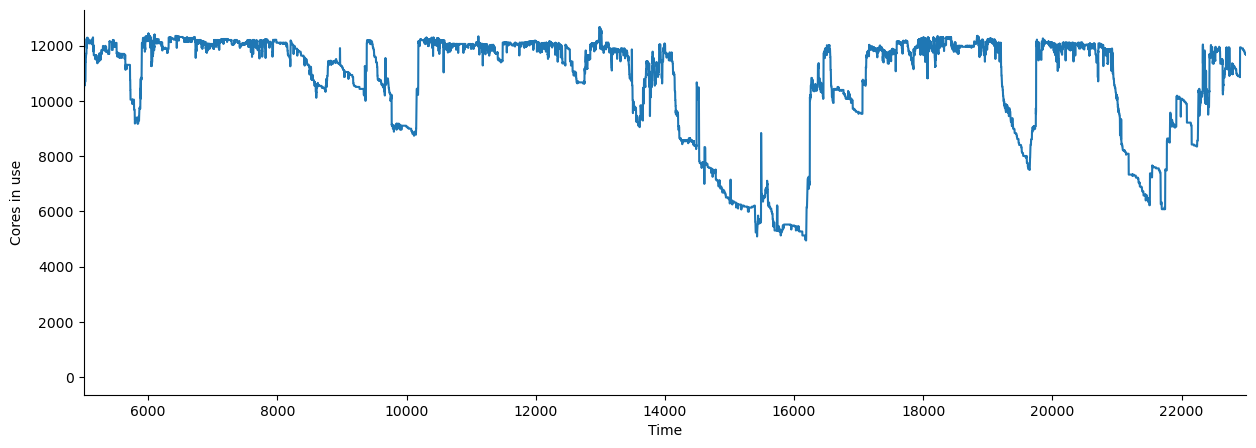

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(measured_load_a)
plt.xlabel("Time")
plt.ylabel("Cores in use")
plt.xlim([5000,23000])
sns.despine()

In [9]:
nCoreTot = 13248
timeLower = 5000
timeUpper= 23000
maxUsage = (timeUpper - timeLower) * nCoreTot

# Descriptive statistics
type = 'Measured'
stats[type] = {}

stats[type]['nJobStart'] = sum((measured_job_df['Start Time'] >= timeLower) & (measured_job_df['End Time'] <= timeUpper))

print(f"Job data:")
print(f"    nJobs = {stats[type]['nJobStart']}")

stats[type]['minLoad'] = min(measured_load_a[timeLower:timeUpper+1])
stats[type]['maxLoad'] = max(measured_load_a[timeLower:timeUpper+1])
stats[type]['medianLoad'] = statistics.median(measured_load_a[timeLower:timeUpper+1])
stats[type]['meanLoad'] = statistics.mean(measured_load_a[timeLower:timeUpper+1])

usageVal = sum(measured_load_a[timeLower:timeUpper+1])

stats[type]['usageIncluded'] = usageVal / 3600.0
stats[type]['usageExcluded'] = sum(measured_load_a[0:timeLower]) + sum(measured_load_a[timeUpper:]) / 3600.0
stats[type]['usageFraction'] = usageVal/maxUsage
stats[type]['residualWork'] = sum(measured_load_a[timeUpper+1:]) / 3600

print(f"Load statistics:")
print(f"           min = {stats[type]['minLoad']}")
print(f"        median = {stats[type]['medianLoad']}")
print(f"           max = {stats[type]['maxLoad']}")
print(f"          mean = {stats[type]['meanLoad']}")
print(f"        %usage = {100 * stats[type]['usageFraction']}")
print(f" residual work = {stats[type]['residualWork']}")

measured_slice_df = measured_job_df.loc[(measured_job_df['Start Time'] >= timeLower) & (measured_job_df['Start Time'] <= timeUpper)]
stats[type]['minWait'] = measured_slice_df['Wait Time'].min()
stats[type]['medianWait'] = measured_slice_df['Wait Time'].median()
stats[type]['maxWait'] = measured_slice_df['Wait Time'].max()
stats[type]['meanWait'] = measured_slice_df['Wait Time'].mean()

print(f"Wait time statistics:")
print(f"    min = {stats[type]['minWait']}")
print(f" median = {stats[type]['medianWait']}")
print(f"    max = {stats[type]['maxWait']}")
print(f"   mean = {stats[type]['meanWait']}")

stats[type]['minTurnaroundTime'] = measured_slice_df['Turnaround Time'].min()
stats[type]['medianTurnaroundTime'] = measured_slice_df['Turnaround Time'].median()
stats[type]['maxTurnaroundTime'] = measured_slice_df['Turnaround Time'].max()
stats[type]['meanTurnaroundTime'] = measured_slice_df['Turnaround Time'].mean()

print(f"Total job time statistics:")
print(f"    min = {stats[type]['minTurnaroundTime']}")
print(f" median = {stats[type]['medianTurnaroundTime']}")
print(f"    max = {stats[type]['maxTurnaroundTime']}")
print(f"   mean = {stats[type]['meanTurnaroundTime']}")





Job data:
    nJobs = 10605
Load statistics:
           min = 4949
        median = 11698
           max = 12664
          mean = 10677
        %usage = 80.60183465848094
 residual work = 8924.3975
Wait time statistics:
    min = 0
 median = 0.0
    max = 4255
   mean = 103.41752721183366
Total job time statistics:
    min = 1
 median = 36.0
    max = 12102
   mean = 437.3735231184296


## Cirrus Rigid + ARCHER2 Rigid

In [10]:
csvfile = open('../cirrus-cpu-rigid-archer2-rigid/data/output/job_statistics.csv', 'r')

csvreader = csv.DictReader(csvfile)
rigid_job_l = []
for row in csvreader:
    rigid_job_l.append(row)




In [11]:
jsonfile = open('../cirrus-cpu-rigid-archer2-rigid/data/input/2024_Q1_CPU-jobs.json', 'r')
jobs_d = json.load(jsonfile)
i = 0
maxtime = 0
totuse = 0
for job in jobs_d['jobs']:
    rigid_job_l[i]['Nodes'] = int(job['num_nodes'])
    rigid_job_l[i]['JobID'] = job['arguments']['jobid']
    totuse = totuse + float(rigid_job_l[i]['Makespan']) * rigid_job_l[i]['Nodes']
    if float(rigid_job_l[i]['End Time']) > maxtime:
        maxtime = math.ceil(float(rigid_job_l[i]['End Time']))
    i += 1

rigid_job_df = pd.DataFrame(rigid_job_l)
rigid_job_df['Start Time'] = rigid_job_df['Start Time'].astype(int)
rigid_job_df['Wait Time'] = rigid_job_df['Wait Time'].astype(float)
rigid_job_df['End Time'] = rigid_job_df['End Time'].astype(float)
rigid_job_df['Nodes'] = rigid_job_df['Nodes'].astype(int)
rigid_job_df['Makespan'] = rigid_job_df['Makespan'].astype(int)
rigid_job_df['Turnaround Time'] = rigid_job_df['Turnaround Time'].astype(int)
rigid_job_df['Coreh'] = rigid_job_df['Makespan'] * rigid_job_df['Nodes'] / 3600.0
rigid_job_df['Efficiency'] = rigid_job_df['Makespan'] / rigid_job_df['Turnaround Time']
rigid_job_df['Job Source'] = 'Cirrus'
rigid_job_df.loc[rigid_job_df['JobID'].str.contains('ar2'), 'Job Source'] = 'ARCHER2'

print(rigid_job_df)

print(rigid_job_df['Coreh'].sum())

          ID   Type Submit Time  Start Time  End Time  Wait Time  Makespan  \
0          0  rigid           0           0    1423.0        0.0      1423   
1          1  rigid           0           0   22868.0        0.0     22868   
2          2  rigid         207         207   19883.0        0.0     19676   
3          3  rigid         276         276   23140.0        0.0     22864   
4          4  rigid         542         542   23464.0        0.0     22922   
...      ...    ...         ...         ...       ...        ...       ...   
12049  12049  rigid       27398       31301   31990.0     3903.0       689   
12050  12050  rigid       27398       31402   32925.0     4004.0      1523   
12051  12051  rigid       29604       31446   33300.0     1842.0      1854   
12052  12052  rigid       29927       31479   33234.0     1552.0      1755   
12053  12053  rigid       29938       31508   33304.0     1570.0      1796   

       Turnaround Time     Status  Nodes        JobID   Coreh  

In [12]:
rigid_load_a = np.zeros(maxtime+1, dtype=int)
rigid_load_cirrus_a = np.zeros(maxtime+1, dtype=int)
rigid_load_archer2_a = np.zeros(maxtime+1, dtype=int)

In [13]:
for job in rigid_job_l:
    temp_a = np.zeros(maxtime+1, dtype=int)
    istart = math.floor(float(job['Start Time']))
    iend = math.ceil(float(job['End Time']))
    nodes = int(job['Nodes'])
    temp_a[istart:iend] = nodes
    rigid_load_a = rigid_load_a + temp_a
    if "ar2" in job['JobID']:
        rigid_load_archer2_a = rigid_load_archer2_a + temp_a
    else:
        rigid_load_cirrus_a = rigid_load_cirrus_a + temp_a

print(rigid_load_a)

[900 900 900 ... 144 144   0]


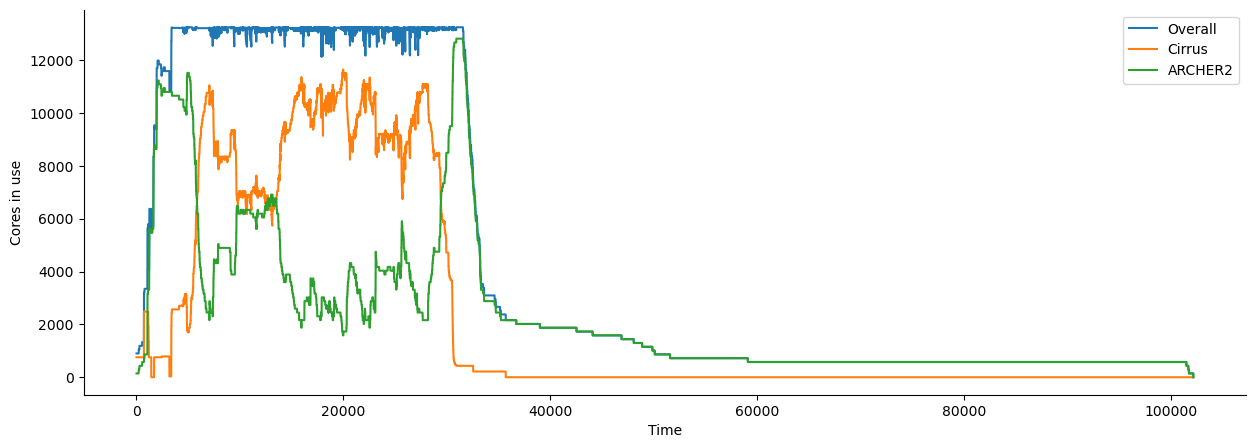

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(rigid_load_a, label='Overall')
plt.plot(rigid_load_cirrus_a, label='Cirrus')
plt.plot(rigid_load_archer2_a, label='ARCHER2')
plt.xlabel("Time")
plt.ylabel("Cores in use")
plt.legend()
sns.despine()


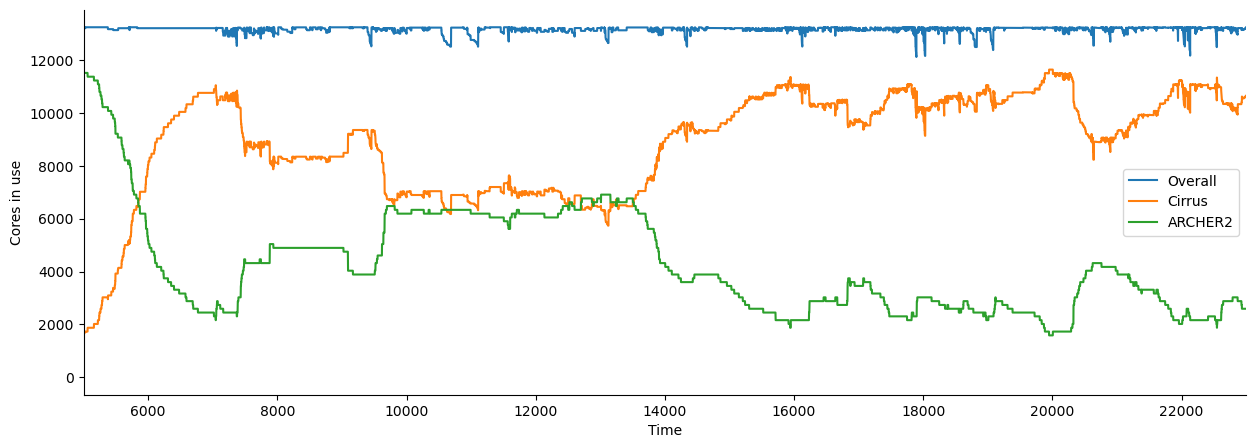

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(rigid_load_a, label='Overall')
plt.plot(rigid_load_cirrus_a, label='Cirrus')
plt.plot(rigid_load_archer2_a, label='ARCHER2')
plt.xlabel("Time")
plt.ylabel("Cores in use")
plt.xlim([5000,23000])
plt.legend()
sns.despine()
plt.savefig("simulated_load_C-R_A-R.png")

In [16]:
nCoreTot = 13248
timeLower = 5000
timeUpper= 23000
maxUsage = (timeUpper - timeLower) * nCoreTot

# Descriptive statistics
type = 'Rigid'
stats[type] = {}


stats[type]['nJobStart'] = sum((rigid_job_df['Start Time'] >= timeLower) & (rigid_job_df['End Time'] <= timeUpper))

print(f"Job data:")
print(f"    nJobs = {stats['Measured']['nJobStart']}")

stats[type]['minLoad'] = min(rigid_load_a[timeLower:timeUpper+1])
stats[type]['maxLoad'] = max(rigid_load_a[timeLower:timeUpper+1])
stats[type]['medianLoad'] = statistics.median(rigid_load_a[timeLower:timeUpper+1])
stats[type]['meanLoad'] = statistics.mean(rigid_load_a[timeLower:timeUpper+1])

usageVal = sum(rigid_load_a[timeLower:timeUpper+1])
stats[type]['usageIncluded'] = usageVal / 3600.0
stats[type]['usageExcluded'] = sum(rigid_load_a[0:timeLower]) + sum(rigid_load_a[timeUpper:]) / 3600.0
stats[type]['usageFraction'] = usageVal/maxUsage
stats[type]['residualWork'] = sum(rigid_load_a[timeUpper+1:]) / 3600

print(f"Load statistics:")
print(f"           min = {stats[type]['minLoad']}")
print(f"        median = {stats[type]['medianLoad']}")
print(f"           max = {stats[type]['maxLoad']}")
print(f"          mean = {stats[type]['meanLoad']}")
print(f"        %usage = {100 * stats[type]['usageFraction']}")
print(f" residual work = {stats[type]['residualWork']}")

rigid_slice_df = rigid_job_df.loc[(rigid_job_df['Start Time'] >= timeLower) & (rigid_job_df['Start Time'] <= timeUpper)]
stats[type]['minWait'] = rigid_slice_df['Wait Time'].min()
stats[type]['medianWait'] = rigid_slice_df['Wait Time'].median()
stats[type]['maxWait'] = rigid_slice_df['Wait Time'].max()
stats[type]['meanWait'] = rigid_slice_df['Wait Time'].mean()



print(f"Wait time statistics:")
print(f"    min = {stats[type]['minWait']}")
print(f" median = {stats[type]['medianWait']}")
print(f"    max = {stats[type]['maxWait']}")
print(f"   mean = {stats[type]['meanWait']}")

stats[type]['minTurnaroundTime'] = rigid_slice_df['Turnaround Time'].min()
stats[type]['medianTurnaroundTime'] = rigid_slice_df['Turnaround Time'].median()
stats[type]['maxTurnaroundTime'] = rigid_slice_df['Turnaround Time'].max()
stats[type]['meanTurnaroundTime'] = rigid_slice_df['Turnaround Time'].mean()

print(f"Total job time statistics:")
print(f"    min = {stats[type]['minTurnaroundTime']}")
print(f" median = {stats[type]['medianTurnaroundTime']}")
print(f"    max = {stats[type]['maxTurnaroundTime']}")
print(f"   mean = {stats[type]['meanTurnaroundTime']}")



Job data:
    nJobs = 10605
Load statistics:
           min = 12123
        median = 13212
           max = 13249
          mean = 13170
        %usage = 99.42225702831455
 residual work = 52845.42916666667
Wait time statistics:
    min = 735.0
 median = 4093.0
    max = 5418.0
   mean = 3925.300834793363
Total job time statistics:
    min = 1167
 median = 4219.0
    max = 31142
   mean = 4285.789652684737


## Cirrus Moldable + ARCHER2 Rigid

In [17]:
csvfile = open('../cirrus-cpu-moldable-archer2-rigid/data/output/job_statistics.csv', 'r')

csvreader = csv.DictReader(csvfile)
moldable_job_l = []
for row in csvreader:
    moldable_job_l.append(row)


print(moldable_job_l[0])
print(moldable_job_l[-1])


{'ID': '0', 'Type': 'moldable', 'Submit Time': '0', 'Start Time': '0', 'End Time': '711.5', 'Wait Time': '0', 'Makespan': '711.5', 'Turnaround Time': '711.5', 'Status': 'completed'}
{'ID': '12053', 'Type': 'rigid', 'Submit Time': '29938', 'Start Time': '31515.5', 'End Time': '33311.5', 'Wait Time': '1577.47', 'Makespan': '1796', 'Turnaround Time': '3373.47', 'Status': 'completed'}


In [18]:
jsonfile = open('../cirrus-cpu-moldable-archer2-rigid/data/input/2024_Q1_CPU-jobs_moldable.json', 'r')
jobs_d = json.load(jsonfile)
i = 0
maxtime = 0
totuse = 0
jobid_l = []
for job in jobs_d['jobs']:
    jobid_l.append(job['arguments']['jobid'])
    moldable_job_l[i]['JobID'] = job['arguments']['jobid']
    moldable_job_l[i]['BaseNodes'] = int(job['arguments']['base_nodes'])
    if job['type'] == 'moldable':
        moldable_job_l[i]['MinNodes'] = int(job['num_nodes_min'])
        moldable_job_l[i]['MaxNodes'] = int(job['num_nodes_max'])
    else:
        moldable_job_l[i]['MinNodes'] = int(job['num_nodes'])
        moldable_job_l[i]['MaxNodes'] = int(job['num_nodes'])
    i += 1


In [19]:
nodedata_df = pd.read_csv('../cirrus-cpu-moldable-archer2-rigid/data/output/node_utilization.csv')
nodedata_df['Count'] = 1
nodedata_df.tail()

,Time,Node,State,Running jobs,Expected jobs,Count
1235684,102009.0,CCPU_5489,free,none,none,1
1235685,102009.0,CCPU_549,free,none,none,1
1235686,102009.0,CCPU_5490,free,none,none,1
1235687,102009.0,CCPU_5524,free,none,none,1
1235688,102009.0,CCPU_5525,free,none,none,1


In [20]:
# nodecount_grouped = nodedata_df.groupby(by='Running jobs')['Count'].sum()
nodecount_grouped = nodedata_df.loc[nodedata_df['State'] == 'allocated'].groupby(by='Running jobs', sort=False)['Running jobs'].count()

In [21]:

for i, job in enumerate(moldable_job_l):
    cores = nodecount_grouped.iloc[i]
    moldable_job_l[i]['Nodes'] = cores
    totuse = totuse + float(moldable_job_l[i]['Makespan']) * moldable_job_l[i]['Nodes']
    if float(moldable_job_l[i]['End Time']) > maxtime:
        maxtime = math.ceil(float(moldable_job_l[i]['End Time']))

moldable_job_df = pd.DataFrame(moldable_job_l)
moldable_job_df['Start Time'] = moldable_job_df['Start Time'].astype(float)
moldable_job_df['Wait Time'] = moldable_job_df['Wait Time'].astype(float)
moldable_job_df['End Time'] = moldable_job_df['End Time'].astype(float)
moldable_job_df['Nodes'] = moldable_job_df['Nodes'].astype(int)
moldable_job_df['Makespan'] = moldable_job_df['Makespan'].astype(float)
moldable_job_df['Coreh'] = moldable_job_df['Makespan'] * moldable_job_df['Nodes'] / 3600.0
moldable_job_df['Turnaround Time'] = moldable_job_df['Turnaround Time'].astype(float)
moldable_job_df['Efficiency'] = moldable_job_df['Makespan'] / moldable_job_df['Turnaround Time']
print(moldable_job_df)

print(moldable_job_df['Coreh'].sum())

          ID      Type Submit Time  Start Time  End Time  Wait Time  Makespan  \
0          0  moldable           0         0.0     711.5       0.00     711.5   
1          1     rigid           0         0.0   22868.0       0.00   22868.0   
2          2     rigid         207       207.0   19883.0       0.00   19676.0   
3          3     rigid         276       276.0   23140.0       0.00   22864.0   
4          4     rigid         542       542.0   23464.0       0.00   22922.0   
...      ...       ...         ...         ...       ...        ...       ...   
12049  12049     rigid       27398     31437.9   32126.9    4039.92     689.0   
12050  12050     rigid       27398     31458.8   32981.8    4060.77    1523.0   
12051  12051     rigid       29604     31507.4   33361.4    1903.38    1854.0   
12052  12052     rigid       29927     31512.3   33267.3    1585.28    1755.0   
12053  12053     rigid       29938     31515.5   33311.5    1577.47    1796.0   

       Turnaround Time     

In [22]:
nrigid = len(moldable_job_df.loc[moldable_job_df['Nodes'] == moldable_job_df['BaseNodes']])
nmoldable = len(moldable_job_df.loc[moldable_job_df['Nodes'] != moldable_job_df['BaseNodes']])
nlarger = len(moldable_job_df.loc[moldable_job_df['Nodes'] > moldable_job_df['BaseNodes']])
nsmaller = len(moldable_job_df.loc[moldable_job_df['Nodes'] < moldable_job_df['BaseNodes']])
ntot = len(moldable_job_df)

print(f'Number of jobs at original size = {nrigid}/{ntot} ({100*nrigid/ntot:.2f}%)')
print(f'Number of jobs molded = {nmoldable}/{ntot} ({100*nmoldable/ntot:.2f}%)')
print(f'Number of jobs larger = {nlarger}/{ntot} ({100*nlarger/ntot:.2f}%)')
print(f'Number of jobs smaller = {nsmaller}/{ntot} ({100*nsmaller/ntot:.2f}%)')

Number of jobs at original size = 1167/12054 (9.68%)
Number of jobs molded = 10887/12054 (90.32%)
Number of jobs larger = 8977/12054 (74.47%)
Number of jobs smaller = 1910/12054 (15.85%)


In [23]:
moldable_load_a = np.zeros(maxtime+1, dtype=int)
moldable_load_cirrus_a = np.zeros(maxtime+1, dtype=int)
moldable_load_archer2_a = np.zeros(maxtime+1, dtype=int)
for job in moldable_job_l:
    temp_a = np.zeros(maxtime+1, dtype=int)
    istart = math.floor(float(job['Start Time']))
    iend = math.ceil(float(job['End Time']))
    nodes = int(job['Nodes'])
    temp_a[istart:iend] = nodes
    moldable_load_a = moldable_load_a + temp_a
    if "ar2" in job['JobID']:
        moldable_load_archer2_a = moldable_load_archer2_a + temp_a
    else:
        moldable_load_cirrus_a = moldable_load_cirrus_a + temp_a

# With the moldable jobs, start and end times can be fractional
# This means that when they are floor'd and ceil'd you can end
# up with times where the load exceeds the number of cores available.
# Rather than doing something intelligent, we clip the array so it is
# in the correct range
moldable_load_a = np.clip(moldable_load_a, a_min=0, a_max=nCoreTot)

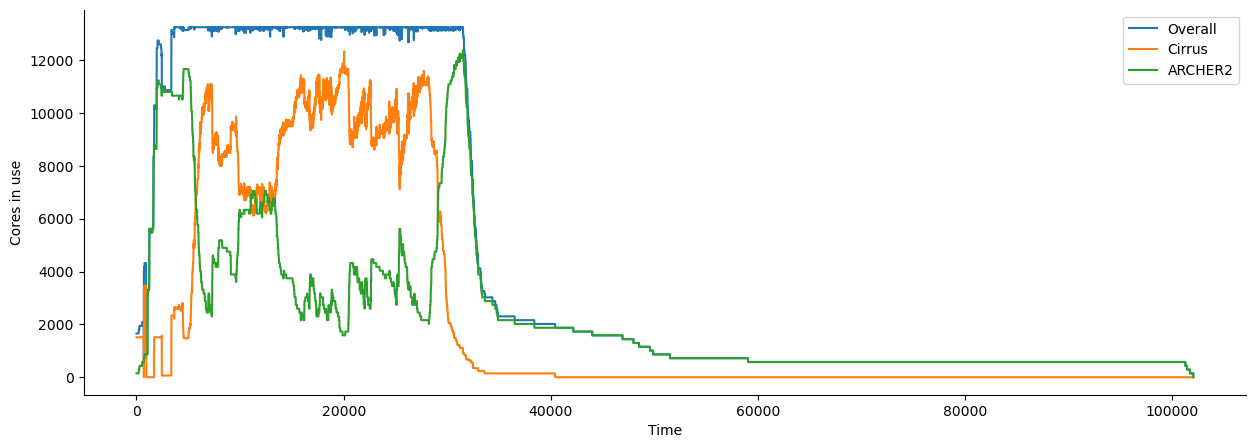

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(moldable_load_a, label='Overall')
plt.plot(moldable_load_cirrus_a, label='Cirrus')
plt.plot(moldable_load_archer2_a, label='ARCHER2')
plt.xlabel("Time")
plt.ylabel("Cores in use")
plt.legend()
sns.despine()
# plt.savefig("simulated_load_moldable.png")

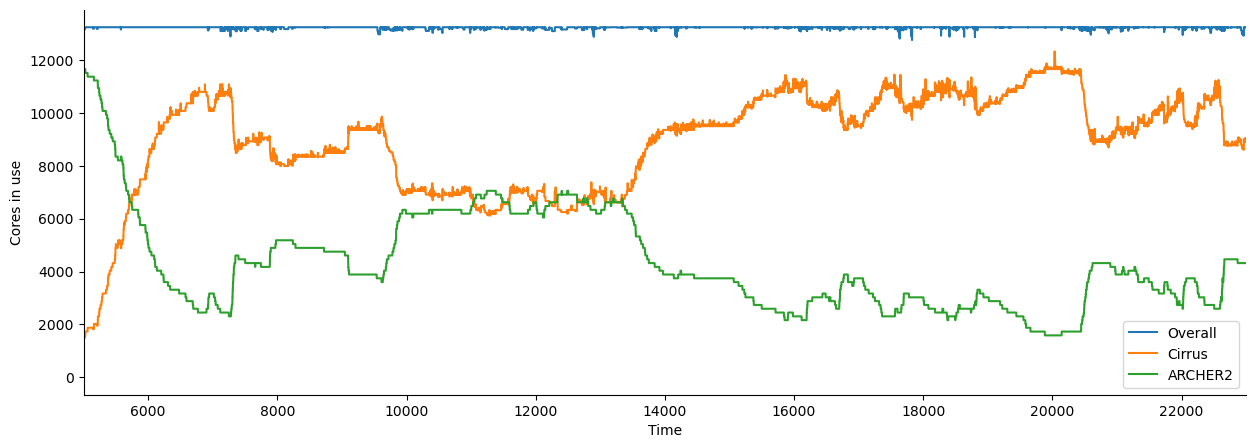

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(moldable_load_a, label='Overall')
plt.plot(moldable_load_cirrus_a, label='Cirrus')
plt.plot(moldable_load_archer2_a, label='ARCHER2')
plt.xlabel("Time")
plt.ylabel("Cores in use")
plt.xlim([5000,23000])
plt.legend()
sns.despine()
plt.savefig("simulated_load_C-M_A-R.png")

In [26]:
nCoreTot = 13248
timeLower = 5000
timeUpper= 23000
maxUsage = (timeUpper - timeLower) * nCoreTot

# Descriptive statistics
type = 'Moldable'
stats[type] = {}


stats[type]['nJobStart'] = sum((moldable_job_df['Start Time'] >= timeLower) & (moldable_job_df['Start Time'] <= timeUpper))

print(f"Job data:")
print(f"    nJobs = {stats[type]['nJobStart']}")

stats[type]['minLoad'] = min(moldable_load_a[timeLower:timeUpper+1])
stats[type]['maxLoad'] = max(moldable_load_a[timeLower:timeUpper+1])
stats[type]['medianLoad'] = statistics.median(moldable_load_a[timeLower:timeUpper+1])
stats[type]['meanLoad'] = statistics.mean(moldable_load_a[timeLower:timeUpper+1])

usageVal = sum(moldable_load_a[timeLower:timeUpper+1])
stats[type]['usageIncluded'] = usageVal / 3600.0
stats[type]['usageExcluded'] = sum(moldable_load_a[0:timeLower]) + sum(moldable_load_a[timeUpper:]) / 3600.0
stats[type]['usageFraction'] = usageVal/maxUsage
stats[type]['residualWork'] = sum(moldable_load_a[timeUpper+1:]) / 3600

print(f"Load statistics:")
print(f"           min = {stats[type]['minLoad']}")
print(f"        median = {stats[type]['medianLoad']}")
print(f"           max = {stats[type]['maxLoad']}")
print(f"          mean = {stats[type]['meanLoad']}")
print(f"        %usage = {100 * stats[type]['usageFraction']}")
print(f" residual work = {stats[type]['residualWork']}")

moldable_slice_df = moldable_job_df.loc[(moldable_job_df['Start Time'] >= timeLower) & (moldable_job_df['Start Time'] <= timeUpper)]
stats[type]['minWait'] = moldable_slice_df['Wait Time'].min()
stats[type]['medianWait'] = moldable_slice_df['Wait Time'].median()
stats[type]['maxWait'] = moldable_slice_df['Wait Time'].max()
stats[type]['meanWait'] = moldable_slice_df['Wait Time'].mean()



print(f"Wait time statistics:")
print(f"    min = {stats[type]['minWait']}")
print(f" median = {stats[type]['medianWait']}")
print(f"    max = {stats[type]['maxWait']}")
print(f"   mean = {stats[type]['meanWait']}")

stats[type]['minTurnaroundTime'] = moldable_slice_df['Turnaround Time'].min()
stats[type]['medianTurnaroundTime'] = moldable_slice_df['Turnaround Time'].median()
stats[type]['maxTurnaroundTime'] = moldable_slice_df['Turnaround Time'].max()
stats[type]['meanTurnaroundTime'] = moldable_slice_df['Turnaround Time'].mean()

print(f"Total job time statistics:")
print(f"    min = {stats[type]['minTurnaroundTime']}")
print(f" median = {stats[type]['medianTurnaroundTime']}")
print(f"    max = {stats[type]['maxTurnaroundTime']}")
print(f"   mean = {stats[type]['meanTurnaroundTime']}")



Job data:
    nJobs = 9827
Load statistics:
           min = 12763
        median = 13248
           max = 13248
          mean = 13231
        %usage = 99.8843460648148
 residual work = 52553.80583333333
Wait time statistics:
    min = 723.0
 median = 3786.43
    max = 5392.02
   mean = 3708.8495227434623
Total job time statistics:
    min = 939.0
 median = 4019.44
    max = 30540.0
   mean = 4003.5984796987887


## Cirrus Rigid + ARCHER2 Moldable

In [27]:
csvfile = open('../cirrus-cpu-rigid-archer2-moldable/data/output/job_statistics.csv', 'r')

csvreader = csv.DictReader(csvfile)
cra2m_job_l = []
for row in csvreader:
    cra2m_job_l.append(row)


print(cra2m_job_l[0])
print(cra2m_job_l[-1])

{'ID': '0', 'Type': 'rigid', 'Submit Time': '0', 'Start Time': '0', 'End Time': '1423', 'Wait Time': '0', 'Makespan': '1423', 'Turnaround Time': '1423', 'Status': 'completed'}
{'ID': '12053', 'Type': 'moldable', 'Submit Time': '29938', 'Start Time': '30165.6', 'End Time': '33757.6', 'Wait Time': '227.61', 'Makespan': '3592', 'Turnaround Time': '3819.61', 'Status': 'completed'}


In [29]:
jsonfile = open('../cirrus-cpu-rigid-archer2-moldable/data/input/2024_Q1_CPU-jobs.json', 'r')
jobs_d = json.load(jsonfile)
i = 0
maxtime = 0
totuse = 0
jobid_l = []
for job in jobs_d['jobs']:
    jobid_l.append(job['arguments']['jobid'])
    cra2m_job_l[i]['JobID'] = job['arguments']['jobid']
    cra2m_job_l[i]['BaseNodes'] = int(job['arguments']['base_nodes'])
    if job['type'] == 'moldable':
        cra2m_job_l[i]['MinNodes'] = int(job['num_nodes_min'])
        cra2m_job_l[i]['MaxNodes'] = int(job['num_nodes_max'])
    else:
        cra2m_job_l[i]['MinNodes'] = int(job['num_nodes'])
        cra2m_job_l[i]['MaxNodes'] = int(job['num_nodes'])
    i += 1


In [30]:
nodedata_df = pd.read_csv('../cirrus-cpu-rigid-archer2-moldable/data/output/node_utilization.csv')
nodedata_df['Count'] = 1
nodedata_df.tail()

,Time,Node,State,Running jobs,Expected jobs,Count
1099070,176873.0,CCPU_6695,free,none,none,1
1099071,176873.0,CCPU_6816,free,none,none,1
1099072,176873.0,CCPU_6817,free,none,none,1
1099073,176873.0,CCPU_6818,free,none,none,1
1099074,176873.0,CCPU_6819,free,none,none,1


In [31]:
nodecount_grouped = nodedata_df.loc[nodedata_df['State'] == 'allocated'].groupby(by='Running jobs', sort=False)['Running jobs'].count()

In [32]:
for i, job in enumerate(cra2m_job_l):
    cores = nodecount_grouped.iloc[i]
    cra2m_job_l[i]['Nodes'] = cores
    totuse = totuse + float(cra2m_job_l[i]['Makespan']) * cra2m_job_l[i]['Nodes']
    if float(cra2m_job_l[i]['End Time']) > maxtime:
        maxtime = math.ceil(float(cra2m_job_l[i]['End Time']))

cra2m_job_df = pd.DataFrame(cra2m_job_l)
cra2m_job_df['Start Time'] = cra2m_job_df['Start Time'].astype(float)
cra2m_job_df['Wait Time'] = cra2m_job_df['Wait Time'].astype(float)
cra2m_job_df['End Time'] = cra2m_job_df['End Time'].astype(float)
cra2m_job_df['Nodes'] = cra2m_job_df['Nodes'].astype(int)
cra2m_job_df['Makespan'] = cra2m_job_df['Makespan'].astype(float)
cra2m_job_df['Coreh'] = cra2m_job_df['Makespan'] * cra2m_job_df['Nodes'] / 3600.0
cra2m_job_df['Turnaround Time'] = cra2m_job_df['Turnaround Time'].astype(float)
cra2m_job_df['Efficiency'] = cra2m_job_df['Makespan'] / cra2m_job_df['Turnaround Time']
print(cra2m_job_df)

print(cra2m_job_df['Coreh'].sum())

          ID      Type Submit Time  Start Time  End Time  Wait Time  Makespan  \
0          0     rigid           0         0.0    1423.0      0.000    1423.0   
1          1  moldable           0         0.0   11434.0      0.000   11434.0   
2          2  moldable         207       207.0   10045.0      0.000    9838.0   
3          3  moldable         276       276.0   11708.0      0.000   11432.0   
4          4  moldable         542       542.0   12003.0      0.000   11461.0   
...      ...       ...         ...         ...       ...        ...       ...   
12049  12049  moldable       27398     30147.3   31883.3   2749.300    1736.0   
12050  12050  moldable       27398     30151.6   33189.6   2753.610    3038.0   
12051  12051  moldable       29604     30154.2   33862.2    550.171    3708.0   
12052  12052  moldable       29927     30156.6   33666.6    229.610    3510.0   
12053  12053  moldable       29938     30165.6   33757.6    227.610    3592.0   

       Turnaround Time     

In [33]:
nrigid = len(cra2m_job_df.loc[cra2m_job_df['Nodes'] == cra2m_job_df['BaseNodes']])
nmoldable = len(cra2m_job_df.loc[cra2m_job_df['Nodes'] != cra2m_job_df['BaseNodes']])
nlarger = len(cra2m_job_df.loc[moldable_job_df['Nodes'] > cra2m_job_df['BaseNodes']])
nsmaller = len(cra2m_job_df.loc[moldable_job_df['Nodes'] < cra2m_job_df['BaseNodes']])
ntot = len(cra2m_job_df)

print(f'Number of jobs at original size = {nrigid}/{ntot} ({100*nrigid/ntot:.2f}%)')
print(f'Number of jobs molded = {nmoldable}/{ntot} ({100*nmoldable/ntot:.2f}%)')
print(f'Number of jobs larger = {nlarger}/{ntot} ({100*nlarger/ntot:.2f}%)')
print(f'Number of jobs smaller = {nsmaller}/{ntot} ({100*nsmaller/ntot:.2f}%)')

Number of jobs at original size = 11674/12054 (96.85%)
Number of jobs molded = 380/12054 (3.15%)
Number of jobs larger = 8977/12054 (74.47%)
Number of jobs smaller = 1910/12054 (15.85%)


In [34]:
cra2m_load_a = np.zeros(maxtime+1, dtype=int)
cra2m_load_cirrus_a = np.zeros(maxtime+1, dtype=int)
cra2m_load_archer2_a = np.zeros(maxtime+1, dtype=int)
for job in cra2m_job_l:
    temp_a = np.zeros(maxtime+1, dtype=int)
    istart = math.floor(float(job['Start Time']))
    iend = math.ceil(float(job['End Time']))
    nodes = int(job['Nodes'])
    temp_a[istart:iend] = nodes
    cra2m_load_a = cra2m_load_a + temp_a
    if "ar2" in job['JobID']:
        cra2m_load_archer2_a = cra2m_load_archer2_a + temp_a
    else:
        cra2m_load_cirrus_a = cra2m_load_cirrus_a + temp_a

# With the moldable jobs, start and end times can be fractional
# This means that when they are floor'd and ceil'd you can end
# up with times where the load exceeds the number of cores available.
# Rather than doing something intelligent, we clip the array so it is
# in the correct range
cra2m_load_a = np.clip(cra2m_load_a, a_min=0, a_max=nCoreTot)

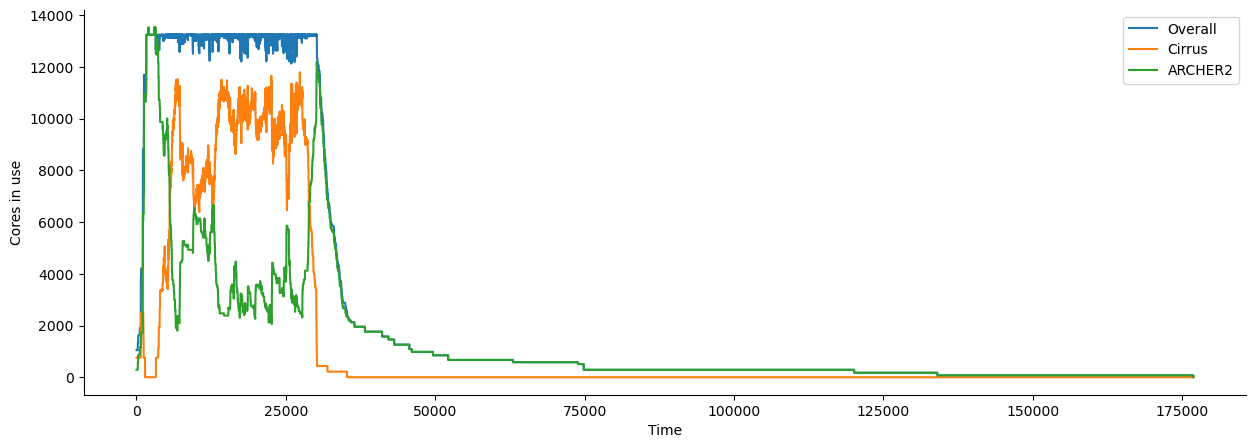

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(cra2m_load_a, label='Overall')
plt.plot(cra2m_load_cirrus_a, label='Cirrus')
plt.plot(cra2m_load_archer2_a, label='ARCHER2')
plt.xlabel("Time")
plt.ylabel("Cores in use")
plt.legend()
sns.despine()

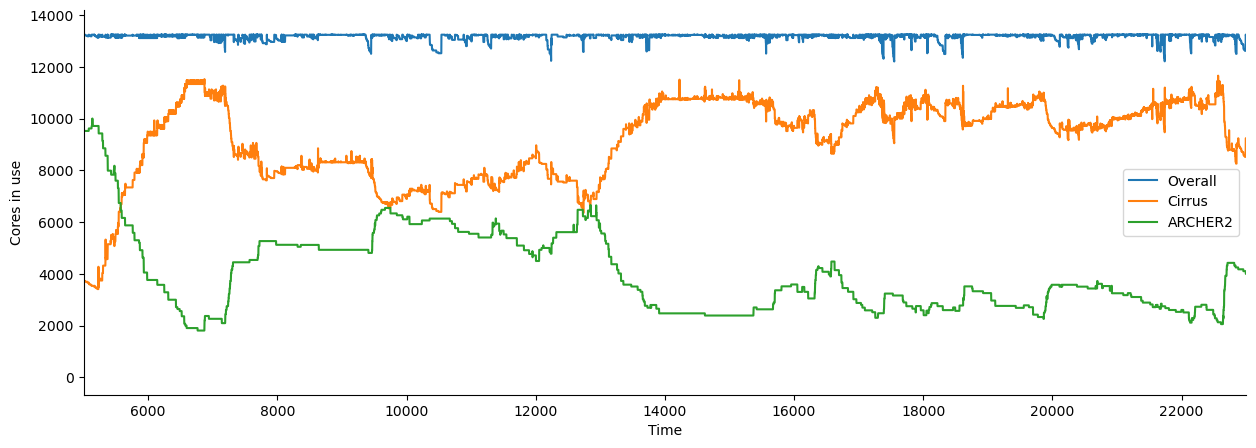

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(cra2m_load_a, label='Overall')
plt.plot(cra2m_load_cirrus_a, label='Cirrus')
plt.plot(cra2m_load_archer2_a, label='ARCHER2')
plt.xlabel("Time")
plt.ylabel("Cores in use")
plt.xlim([5000,23000])
plt.legend()
sns.despine()
plt.savefig("simulated_load_C-R_A-M.png")

In [37]:
nCoreTot = 13248
timeLower = 5000
timeUpper= 23000
maxUsage = (timeUpper - timeLower) * nCoreTot

# Descriptive statistics
type = 'C-R A2-M'
stats[type] = {}


stats[type]['nJobStart'] = sum((cra2m_job_df['Start Time'] >= timeLower) & (cra2m_job_df['Start Time'] <= timeUpper))

print(f"Job data:")
print(f"    nJobs = {stats[type]['nJobStart']}")

stats[type]['minLoad'] = min(cra2m_load_a[timeLower:timeUpper+1])
stats[type]['maxLoad'] = max(cra2m_load_a[timeLower:timeUpper+1])
stats[type]['medianLoad'] = statistics.median(cra2m_load_a[timeLower:timeUpper+1])
stats[type]['meanLoad'] = statistics.mean(cra2m_load_a[timeLower:timeUpper+1])

usageVal = sum(cra2m_load_a[timeLower:timeUpper+1])
stats[type]['usageIncluded'] = usageVal / 3600.0
stats[type]['usageExcluded'] = sum(cra2m_load_a[0:timeLower]) + sum(cra2m_load_a[timeUpper:]) / 3600.0
stats[type]['usageFraction'] = usageVal/maxUsage
stats[type]['residualWork'] = sum(cra2m_load_a[timeUpper+1:]) / 3600

print(f"Load statistics:")
print(f"           min = {stats[type]['minLoad']}")
print(f"        median = {stats[type]['medianLoad']}")
print(f"           max = {stats[type]['maxLoad']}")
print(f"          mean = {stats[type]['meanLoad']}")
print(f"        %usage = {100 * stats[type]['usageFraction']}")
print(f" residual work = {stats[type]['residualWork']}")

cra2m_slice_df = cra2m_job_df.loc[(cra2m_job_df['Start Time'] >= timeLower) & (cra2m_job_df['Start Time'] <= timeUpper)]
stats[type]['minWait'] = cra2m_slice_df['Wait Time'].min()
stats[type]['medianWait'] = cra2m_slice_df['Wait Time'].median()
stats[type]['maxWait'] = cra2m_slice_df['Wait Time'].max()
stats[type]['meanWait'] = cra2m_slice_df['Wait Time'].mean()



print(f"Wait time statistics:")
print(f"    min = {stats[type]['minWait']}")
print(f" median = {stats[type]['medianWait']}")
print(f"    max = {stats[type]['maxWait']}")
print(f"   mean = {stats[type]['meanWait']}")

stats[type]['minTurnaroundTime'] = cra2m_slice_df['Turnaround Time'].min()
stats[type]['medianTurnaroundTime'] = cra2m_slice_df['Turnaround Time'].median()
stats[type]['maxTurnaroundTime'] = cra2m_slice_df['Turnaround Time'].max()
stats[type]['meanTurnaroundTime'] = cra2m_slice_df['Turnaround Time'].mean()

print(f"Total job time statistics:")
print(f"    min = {stats[type]['minTurnaroundTime']}")
print(f" median = {stats[type]['medianTurnaroundTime']}")
print(f"    max = {stats[type]['maxTurnaroundTime']}")
print(f"   mean = {stats[type]['meanTurnaroundTime']}")



Job data:
    nJobs = 9848
Load statistics:
           min = 12211
        median = 13216
           max = 13248
          mean = 13168
        %usage = 99.40492149758454
 residual work = 51014.92
Wait time statistics:
    min = 758.0
 median = 3685.0
    max = 4799.0
   mean = 3499.8782363931764
Total job time statistics:
    min = 955.5
 median = 3766.5
    max = 31768.0
   mean = 3878.8384260763605


## Comparisons

In [161]:
print(f"|              Stat |       Measured |     C-R + A2-R |     C-M + A2-R |")
print(f"|-------------------|----------------|----------------|----------------|")
print(f"| General stats     |                |                |                |")
print(f"|    Usage fraction | {stats['Measured']['usageFraction']:14.4f} | {stats['Rigid']['usageFraction']:14.4f} | {stats['Moldable']['usageFraction']:14.4f} |")
print(f"|             Coreh | {stats['Measured']['usageIncluded']:14.0f} | {stats['Rigid']['usageIncluded']:14.0f} | {stats['Moldable']['usageIncluded']:14.0f} |")
print(f"|    Residual Coreh | {stats['Measured']['residualWork']:14.0f} | {stats['Rigid']['residualWork']:14.0f} | {stats['Moldable']['residualWork']:14.0f} |")
print(f"|              Jobs | {stats['Measured']['nJobStart']:14d} | {stats['Rigid']['nJobStart']:14d} | {stats['Moldable']['nJobStart']:14d} |")
print(f"| Load stats        |                |                |                |")
print(f"|         Min. load | {stats['Measured']['minLoad']:14.2f} | {stats['Rigid']['minLoad']:14.2f} | {stats['Moldable']['minLoad']:14.2f} |")
print(f"|       Median load | {stats['Measured']['medianLoad']:14.2f} | {stats['Rigid']['medianLoad']:14.2f} | {stats['Moldable']['medianLoad']:14.2f} |")
print(f"|         Mean load | {stats['Measured']['meanLoad']:14.2f} | {stats['Rigid']['meanLoad']:14.2f} | {stats['Moldable']['meanLoad']:14.2f} |")
print(f"|         Max. load | {stats['Measured']['maxLoad']:14.2f} | {stats['Rigid']['maxLoad']:14.2f} | {stats['Moldable']['maxLoad']:14.2f} |")
print(f"| Wait stats        |                |                |                |")
print(f"|         Min. wait | {stats['Measured']['minWait']:14.2f} | {stats['Rigid']['minWait']:14.2f} | {stats['Moldable']['minWait']:14.2f} |")
print(f"|       Median wait | {stats['Measured']['medianWait']:14.2f} | {stats['Rigid']['medianWait']:14.2f} | {stats['Moldable']['medianWait']:14.2f} |")
print(f"|         Mean wait | {stats['Measured']['meanWait']:14.2f} | {stats['Rigid']['meanWait']:14.2f} | {stats['Moldable']['meanWait']:14.2f} |")
print(f"|         Max. wait | {stats['Measured']['maxWait']:14.2f} | {stats['Rigid']['maxWait']:14.2f} | {stats['Moldable']['maxWait']:14.2f} |")
print(f"| Turnaround stats  |                |                |                |")
print(f"|   Min. turnaround | {stats['Measured']['minTurnaroundTime']:14.2f} | {stats['Rigid']['minTurnaroundTime']:14.2f} | {stats['Moldable']['minTurnaroundTime']:14.2f} |")
print(f"| Median turnaround | {stats['Measured']['medianTurnaroundTime']:14.2f} | {stats['Rigid']['medianTurnaroundTime']:14.2f} | {stats['Moldable']['medianTurnaroundTime']:14.2f} |")
print(f"|   Mean turnaround | {stats['Measured']['meanTurnaroundTime']:14.2f} | {stats['Rigid']['meanTurnaroundTime']:14.2f} | {stats['Moldable']['meanTurnaroundTime']:14.2f} |")
print(f"|   Max. turnaround | {stats['Measured']['maxTurnaroundTime']:14.2f} | {stats['Rigid']['maxTurnaroundTime']:14.2f} | {stats['Moldable']['maxTurnaroundTime']:14.2f} |")

|              Stat |       Measured |     Rigid Sim. |  Moldable Sim. |
|-------------------|----------------|----------------|----------------|
| General stats     |                |                |                |
|    Usage fraction |         0.8060 |         0.9942 |         0.9988 |
|             Coreh |          53391 |          65857 |          66163 |
|    Residual Coreh |           8924 |          52845 |          52554 |
|              Jobs |          10605 |           9466 |           9827 |
| Load stats        |                |                |                |
|         Min. load |        4949.00 |       12123.00 |       12763.00 |
|       Median load |       11698.00 |       13212.00 |       13248.00 |
|         Mean load |       10677.00 |       13170.00 |       13231.00 |
|         Max. load |       12664.00 |       13249.00 |       13248.00 |
| Wait stats        |                |                |                |
|         Min. wait |           0.00 |         735.

In [162]:
nrigid = len(moldable_slice_df.loc[moldable_slice_df['Nodes'] == moldable_slice_df['BaseNodes']])
nmoldable = len(moldable_slice_df.loc[moldable_slice_df['Nodes'] != moldable_slice_df['BaseNodes']])
nlarger = len(moldable_slice_df.loc[moldable_slice_df['Nodes'] > moldable_slice_df['BaseNodes']])
nsmaller = len(moldable_slice_df.loc[moldable_slice_df['Nodes'] < moldable_slice_df['BaseNodes']])
ntot = len(moldable_slice_df)

print(f'Number of jobs at original size = {nrigid}/{ntot} ({100*nrigid/ntot:.2f}%)')
print(f'Number of jobs molded = {nmoldable}/{ntot} ({100*nmoldable/ntot:.2f}%)')
print(f'Number of jobs larger = {nlarger}/{ntot} ({100*nlarger/ntot:.2f}%)')
print(f'Number of jobs smaller = {nsmaller}/{ntot} ({100*nsmaller/ntot:.2f}%)')

Number of jobs at original size = 856/9827 (8.71%)
Number of jobs molded = 8971/9827 (91.29%)
Number of jobs larger = 7568/9827 (77.01%)
Number of jobs smaller = 1403/9827 (14.28%)
